In [26]:
#Imports
#
#Imports for unused modules are commented out to minimize errors and setup.

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import math
#import time
import matplotlib.animation as animation
#import seaborn as sns
#from graphics import *
#import sys
#import random
import re
from tqdm import tqdm
#import pandas as pd
import copy

In [27]:
def step(bodies, Δt, C=[1/6, 1/3, 1/3, 1/6], G=6.67430E-11):
    """
    This function simulates a single timestep of orbital motion.
    
    INPUTS
    bodies: A list containing the data for the bodies involved in the simulation.
    Δt:     The length of the timestep.
    C:      A list of coefficients on the Runge-Kutta terms.
    G:      The Gravitational Constant.
    
    OUTPUTS
    newbodies: A list of the same form as the input 'bodies' but with updated positions and velocities according to the calculated motion.
    """
    
    ND = len(bodies[0][1]) #The number of spacial dimensions used in the simulation.
    N = len(bodies) #The number of bodies in the simulation.
    
    ms = np.zeros(N) #Empty array of the masses.
    P_0 = np.zeros([N, ND]) #Empty array of the positions for each body.
    v_0 = np.zeros([N, ND]) #Empty array of the velocities for each body.
    
    for i in range(N): #For each body...
        ms[i], P_0[i], v_0[i] = bodies[i][:] #Set the corresponding index of the mass, position, and velocity arrays to the data of each body.
    
    P_1 = np.zeros([N, ND]) #Empty array of the positions for each body.
    
    for i in range(N): #For each body...
        
        #### Position ####
        
        k_1 = v_0[i]

        a = np.zeros(ND) #Empty array of the acceleration of the current body.
        for j in range(N): #For each body...
            if (j != i): #If the bodies are different...
                r = P_0[j] - (P_0[i] + (Δt/2)*k_1) #Calculate position vector from one body to the other.
                a = a + (G*ms[j]/(np.linalg.norm(r)**3))*r #Add acceleration of the ith body due to the jth body.
        k_2 = v_0[i] + (Δt/2)*a

        a = np.zeros(ND) #Empty array of the acceleration of the current body.
        for j in range(N): #For each body...
            if (j != i): #If the bodies are different...
                r = P_0[j] - (P_0[i] + (Δt/2)*k_2) #Calculate position vector from one body to the other.
                a = a + (G*ms[j]/(np.linalg.norm(r)**3))*r #Add acceleration of the ith body due to the jth body.
        k_3 = v_0[i] + (Δt/2)*a

        a = np.zeros(ND) #Empty array of the acceleration of the current body.
        for j in range(N): #For each body...
            if (j != i): #If the bodies are different...
                r = P_0[j] - (P_0[i] + k_3*Δt) #Calculate position vector from one body to the other.
                a = a + (G*ms[j]/(np.linalg.norm(r)**3))*r #Add acceleration of the ith body due to the jth body.
        k_4 = v_0[i] + Δt*a
        

        P_1[i] = P_0[i] + Δt*(C[0]*k_1 + C[1]*k_2 + C[2]*k_3 + C[3]*k_4) #Calculate new position.
    
    
    v_1 = np.zeros([N, ND]) #Empty array of the velocities for each body.
    
    for i in range(N): #For each body...
        
        #### Velocity ####
        
        a = np.zeros(ND) #Empty array of the acceleration of the current body.
        for j in range(N): #For each body...
            if (j != i): #If the bodies are different...
                r = P_0[j] - P_0[i] #Calculate the position vector from one body to the other.
                a = a + (G*ms[j]/(np.linalg.norm(r)**3))*r #Add acceleration of the ith body due to the jth body.
        k_1 = a

        a = np.zeros(ND) #Empty array of the acceleration of the current body.
        for j in range(N): #For each body...
            if (j != i): #If the bodies are different...
                r = P_1[j] - P_1[i] #Calculate the position vector from one body to the other.
                a = a + (G*ms[j]/(np.linalg.norm(r)**3))*r #Add acceleration of the ith body due to the jth body.
        k_2 = a
        

        v_1[i] = v_0[i] + (1/2)*Δt*(k_1 + k_2) #Calculate new velocity.
    
    
    newbodies = bodies 
    for i in range(N): #For each body...
        newbodies[i][1] = P_1[i] #Update the position.
        newbodies[i][2] = v_1[i] #Update the velocity.
    
    return newbodies

In [36]:
def sim(bodies, t_0, t_1, Δt, C, G=6.67430E-11):
    """
    This function repeats the function 'step' over a time interval with a given timestep.
    
    INPUTS
    bodies: A list containing the data for the bodies involved in the simulation.
    t_0:    The initial time.
    t_1:    The final time (inclusive).
    Δt:     The length of the timestep.
    C:      A list of coefficients on the Runge-Kutta terms.
    G:      The Gravitational Constant.
    
    OUTPUTS
    bodies: A list of the same form as the input 'bodies' but with updated positions and velocities according to the calculated motion.
    Ps:     The position data of all of the bodies.
    ts:     The time data.
    """
    
    ts = np.arange(t_0, t_1+Δt, Δt) #Create the time data.
    Ps = [[] for i in range(0,len(bodies))] #Create an empty list with one empty list for each body intended for that body's position.
    
    for i in tqdm(ts): #For each timestep...
        bodies = step(bodies, Δt, C, G) #Compute the new body data.
        for j in range(len(bodies)): #For each body...
            Ps[j].append(bodies[j][1]) #Record the positions of each body from that timestep.
    
    return bodies, Ps, ts

[ -2312.30129457 606181.5816646 ]


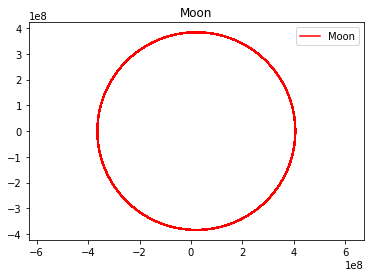

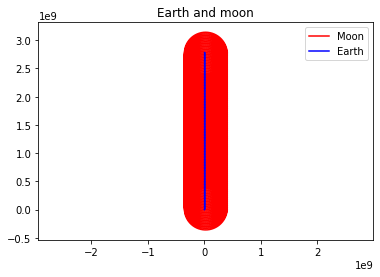

In [29]:
bodies0 = [
    [5.97e24, [0, 0], [0, 0]],
    [0.07346e24, [0.4055e9, 0], [0, 0.970e3]]
]

G=6.67430E-11

bodies = copy.deepcopy(bodies0)
bodies, Ps, ts = sim(bodies, 0, 2360448*100, 1000, [0.25, 0.25, 0.25, 0.25])

fig, axe = plt.subplots()
axe.axis('equal')

xs = []
ys = []
for i in range(len(Ps[0])):
    xs.append(Ps[1][i][0] - Ps[0][i][0])
    ys.append(Ps[1][i][1] - Ps[0][i][1])
axe.plot(xs, ys, "RED", label="Moon")
plt.title("Moon")
plt.legend()

print(np.array([xs[-1]-xs[0], ys[-1]-ys[0]]))

fig2, axe2 = plt.subplots()
axe2.axis('equal')

xs = []
ys = []
xs2 = []
ys2 = []
for i in range(len(Ps[0])):
    xs.append(Ps[1][i][0])
    ys.append(Ps[1][i][1])
    xs2.append(Ps[0][i][0])
    ys2.append(Ps[0][i][1])
axe2.plot(xs, ys, "RED", label="Moon")
axe2.plot(xs2, ys2, "BLUE", label="Earth")
plt.title("Earth and moon")
plt.legend()

[-2.96553514e+11  2.95934267e+10]


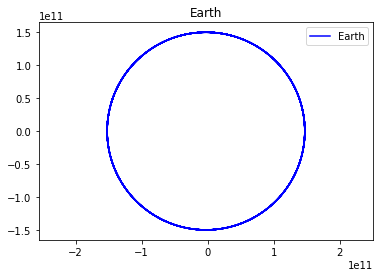

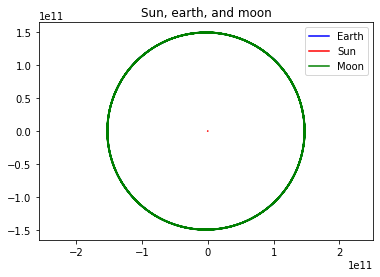

In [32]:
bodies0 = [
    [1988500e24, [0, 0], [0, 0]],
    [5.97e24, [147.1e9, 0], [0, 30.29e3]],
    [0.07346e24, [0.4055e9+147.1e9, 0], [0, 0.970e3+30.29e3]]
]

G=6.67430E-11

bodies = copy.deepcopy(bodies0)
bodies, Ps, ts = sim(bodies, 0, 2360448*100, 1000, [0.25, 0.25, 0.25, 0.25])

fig, axe = plt.subplots()
axe.axis('equal')
plt.title("Earth")

xs = []
ys = []
for i in range(len(Ps[0])):
    xs.append(Ps[1][i][0] - Ps[0][i][0])
    ys.append(Ps[1][i][1] - Ps[0][i][1])
axe.plot(xs, ys, "BLUE", label="Earth")
plt.legend()

fig2, axe2 = plt.subplots()
axe2.axis('equal')

xs = []
ys = []
xs2 = []
ys2 = []
xs3 = []
ys3 = []
for i in range(len(Ps[0])):
    xs.append(Ps[1][i][0])
    ys.append(Ps[1][i][1])
    xs2.append(Ps[0][i][0])
    ys2.append(Ps[0][i][1])
    xs3.append(Ps[2][i][0])
    ys3.append(Ps[2][i][1])
axe2.plot(xs, ys, "BLUE", label="Earth")
axe2.plot(xs2, ys2, "RED", label="Sun")
axe2.plot(xs3, ys3, "GREEN", label="Moon")
plt.title("Sun, earth, and moon")
plt.legend()

print(np.array([xs[-1], ys[-1]]) - np.array([xs[0], ys[0]]))

[-2.97803007e+11  2.08835907e+10]


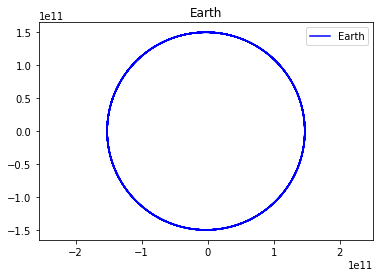

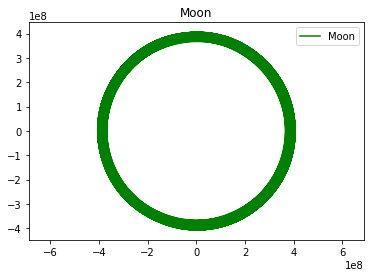

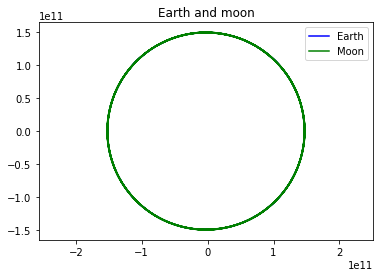

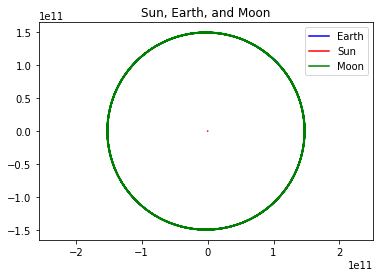

In [34]:
bodies0 = [
    [1988500e24, [0, 0], [0, 0]],
    [5.97e24, [147.1e9, 0], [0, 30.29e3]],
    [0.07346e24, [147.1e9, -0.4055e9], [0.970e3, 30.29e3]]
]

G=6.67430E-11

bodies = copy.deepcopy(bodies0)
bodies, Ps, ts = sim(bodies, 0, 2360448*100, 1000, [0.25, 0.25, 0.25, 0.25])

fig, axe = plt.subplots()
axe.axis('equal')

xs = []
ys = []
for i in range(len(Ps[0])):
    xs.append(Ps[1][i][0] - Ps[0][i][0])
    ys.append(Ps[1][i][1] - Ps[0][i][1])
axe.plot(xs, ys, "BLUE", label="Earth")
plt.title("Earth")
plt.legend()

fig3, axe3 = plt.subplots()
axe3.axis('equal')
xs = []
ys = []
for i in range(len(Ps[0])):
    xs.append(Ps[2][i][0] - Ps[1][i][0])
    ys.append(Ps[2][i][1] - Ps[1][i][1])
axe3.plot(xs, ys, "GREEN", label="Moon")
plt.title("Moon")
plt.legend()

fig2, axe2 = plt.subplots()
axe2.axis('equal')

xs = []
ys = []
xs2 = []
ys2 = []
xs3 = []
ys3 = []
for i in range(len(Ps[0])):
    xs.append(Ps[1][i][0])
    ys.append(Ps[1][i][1])
    xs2.append(Ps[0][i][0])
    ys2.append(Ps[0][i][1])
    xs3.append(Ps[2][i][0])
    ys3.append(Ps[2][i][1])
axe2.plot(xs, ys, "BLUE", label="Earth")
axe2.plot(xs3, ys3, "GREEN", label="Moon")
plt.title("Earth and moon")
plt.legend()

fig4, axe4 = plt.subplots()
axe4.axis('equal')

xs = []
ys = []
xs2 = []
ys2 = []
xs3 = []
ys3 = []
for i in range(len(Ps[0])):
    xs.append(Ps[1][i][0])
    ys.append(Ps[1][i][1])
    xs2.append(Ps[0][i][0])
    ys2.append(Ps[0][i][1])
    xs3.append(Ps[2][i][0])
    ys3.append(Ps[2][i][1])
axe4.plot(xs, ys, "BLUE", label="Earth")
axe4.plot(xs2, ys2, "RED", label="Sun")
axe4.plot(xs3, ys3, "GREEN", label="Moon")
plt.title("Sun, Earth, and Moon")
plt.legend()

print(np.array([xs[-1], ys[-1]]) - np.array([xs[0], ys[0]]))

In [42]:
bodies0 = [
    [1988500e24, [0, 0], [0, 0]], #Sun
    [5.9724e24, [147.1e9, 0], [0, 30.29e3]], #Earth
    [0.33011e24, [0, 69.817e9], [-38.86e3, 0]], #Mercury
    [4.8675e24, [-107.476e9, 0], [0, -35.26e3]], #Venus
    [0.64171e24, [0, -249.229e9], [21.97e3, 0]], #Mars
    [1898.19e24, [740.522e9, 0], [0, 13.72e3]], #Jupiter
    [568.34e24, [0, 1514.504e9], [-9.09e3, 0]], #Saturn
    [86.813e24, [-2741.302e9, 0], [0, -7.11e3]], #Uranus
    [102.413e24, [0, -4545.671e9], [5.37e3, 0]] #Neptune
]

G=6.67430E-11

bodies = copy.deepcopy(bodies0)
bodies, Ps, ts = sim(bodies, 0, 2360448*1000, 10000, [0.25, 0.25, 0.25, 0.25])

fig, axe = plt.subplots()
axe.axis('equal')

xs = []
ys = []
xs2 = []
ys2 = []
xs3 = []
ys3 = []
xs4 = []
ys4 = []
xs5 = []
ys5 = []
xs6 = []
ys6 = []
xs7 = []
ys7 = []
xs8 = []
ys8 = []
xs9 = []
ys9 = []
for i in range(len(Ps[0])):
    xs.append(Ps[0][i][0])
    ys.append(Ps[0][i][1])
    xs2.append(Ps[1][i][0])
    ys2.append(Ps[1][i][1])
    xs3.append(Ps[2][i][0])
    ys3.append(Ps[2][i][1])
    xs4.append(Ps[3][i][0])
    ys4.append(Ps[3][i][1])
    xs5.append(Ps[4][i][0])
    ys5.append(Ps[4][i][1])
    xs6.append(Ps[5][i][0])
    ys6.append(Ps[5][i][1])
    xs7.append(Ps[6][i][0])
    ys7.append(Ps[6][i][1])
    xs8.append(Ps[7][i][0])
    ys8.append(Ps[7][i][1])
    xs9.append(Ps[8][i][0])
    ys9.append(Ps[8][i][1])
    
axe.plot(xs, ys, "RED", label="Sun")
axe.plot(xs2, ys2, "BLUE", label="Earth")
axe.plot(xs3, ys3, "YELLOW", label="Mercury")
axe.plot(xs4, ys4, "GREEN", label="Venus")
axe.plot(xs5, ys5, "ORANGE", label="Mars")
axe.plot(xs6, ys6, "BLACK", label="Jupiter")
axe.plot(xs7, ys7, "PURPLE", label="Saturn")
axe.plot(xs8, ys8, "MEDIUMSPRINGGREEN", label="Uranus")
axe.plot(xs9, ys9, "ROYALBLUE", label="Neptune")
plt.title("Solar System")
plt.legend()

 10%|███████▍                                                                  | 23583/236046 [01:11<10:46, 328.42it/s]


KeyboardInterrupt: 